In [ ]:
    try:
        from google.colab import drive

        print('Colab environment detected. Mounting drive...')
        drive.mount('/content/drive')

        print('Mounted. Switching to directory... ', end = '')
        %cd /content/drive/'My Drive'/CILroadseg
        print('done.')
    except:
        print('Colab environment not found. Working on ordinary directory.')

In [ ]:
import numpy as np
import sys
import os
import matplotlib.image as mpimg

from util.submit import *
from util.helpers import *
from util.visualize import *
from util.notebooks import *
from util.cross_validation import cross_validate

## Loading Training Data

In [ ]:
train_dir = "training/images/"
gt_dir = "training/groundtruth/"
test_dir = "test/images/"

X, Y, X_test = nb_load_data(train_dir, gt_dir, test_dir)

## Decomposer + ResNet/CNN

In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
try: 
  print('set memory growth')
  tf.config.experimental.set_memory_growth(physical_devices[0], True) 
except: 
  # Invalid device or cannot modify virtual devices once initialized. 
  pass 

In [4]:
import tensorflow as tf
from tensorflow import keras

from decomposer import *
from zero_classifier import *
from resnet_50 import *
from cnn import *

Using TensorFlow backend.


In [5]:
model = Decomposer(ResnetModel())

In [6]:
choice = 'cv'

np.random.seed(1) #fix randomness
if choice == 'cv':
  cross_validate(model, 2, X, Y)

elif choice == 'tr':
  model.initialize()
  model.train(Y, X) 

else:
  model.load("saves/final/cnn.h5")

Resnet retrieved successfully.
  ...
    to  
  ['...']
Train for 200 steps
Epoch 1/30
200/200 [==============================] - 125s 627ms/step - loss: 0.5315 - accuracy: 0.7500
Epoch 2/30
200/200 [==============================] - 115s 576ms/step - loss: 0.4031 - accuracy: 0.8164
Epoch 3/30
200/200 [==============================] - 120s 598ms/step - loss: 0.3349 - accuracy: 0.8510
Epoch 4/30
200/200 [==============================] - 121s 604ms/step - loss: 0.2786 - accuracy: 0.8855
Epoch 5/30
200/200 [==============================] - 121s 606ms/step - loss: 0.2443 - accuracy: 0.9006
Epoch 6/30
200/200 [==============================] - 121s 606ms/step - loss: 0.2292 - accuracy: 0.9068
Epoch 7/30
200/200 [==============================] - 123s 613ms/step - loss: 0.2049 - accuracy: 0.9172
Epoch 8/30
200/200 [==============================] - 122s 608ms/step - loss: 0.1997 - accuracy: 0.9243
Epoch 9/30
200/200 [==============================] - 121s 605ms/step - loss: 0.1872 - accur

## Model Saving

In [7]:
weights_file = "saves/final/zero.h5"

nb_save_model(model, weights_file)

[Target file: saves/final/zero.h5]
Saving model to disk...done.


In [8]:
test_masks_dir = "test/pred/"
test_dir = "test/images/"

nb_predict_masks(model, test_dir, test_masks_dir)

Predicting test cases... 
Progress: done.


In [14]:
image_paths = [test_masks_dir + file for file in os.listdir(test_masks_dir)]

masks_to_submission("test/pred/resnet50.csv", image_paths)

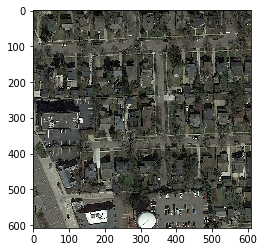

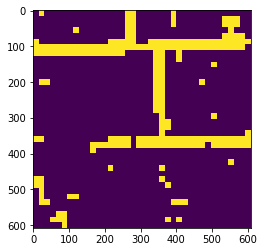

In [15]:
num_of_img = X_test.shape[0]
img_size = (X_test.shape[1], X_test.shape[2])
Zi = model.classify(X_test)
Y_pred = model.recompose(Zi, num_of_img, img_size)
view_image_mask(X_test[4], Y_pred[4])